from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
# ^^^ pyforest auto-imports - don't write above this line
# Diabetes Prediction

This dataset consist of different columns using which a model is built to predict whether a person is having diabetes or not.

In [23]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import scipy.stats as st
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Info function helps us to understand that there are 
    768 rows and 9 columns
    
- From the 9 columns,all the columns are numeric.

- All the columns have 768 entries i.e no null values are present.

- Target column: Outcome which have values 0/1 which means it is an classification problem.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Five point summary

- Here count column helps us to understand that there are no null values in the dataset.

- Comparing mean and median(50%),gives an idea if outliers are present in the columns.

In [5]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- In the target column:

    Non-Diabetic Patient (0) are 500
    
    Diabetic Patient (1) are 268

# Data Visualization

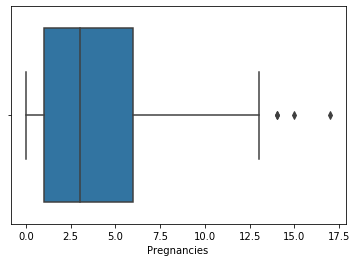

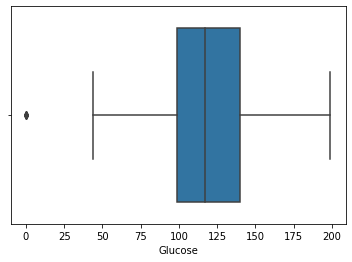

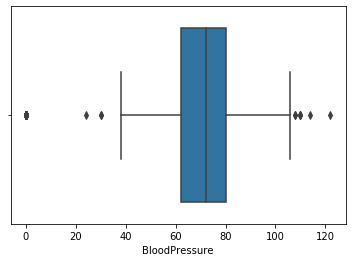

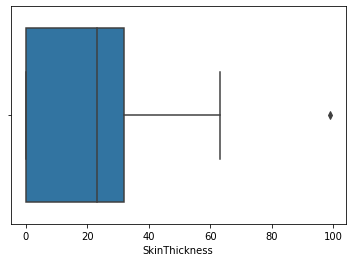

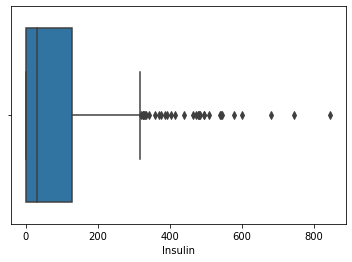

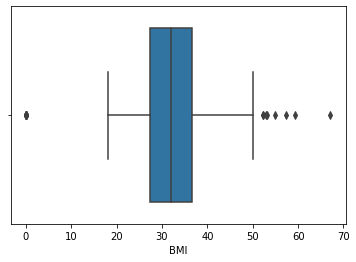

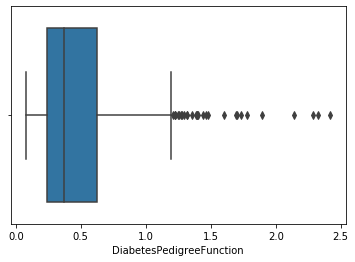

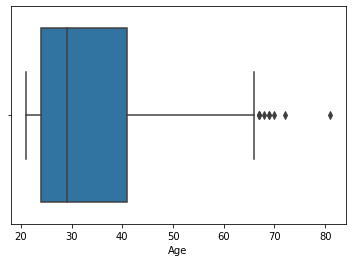

In [7]:
#checking outliers using boxplot

columns=list(df.columns)
columns.remove('Outcome')

for col in columns:
    sns.boxplot(df[col])
    plt.show()

- In the boxplot graph we see all columns have ouliers present.

- Few columns like Insulin,BMI,DiabetesPedigreeFunction have large number of outliers present.

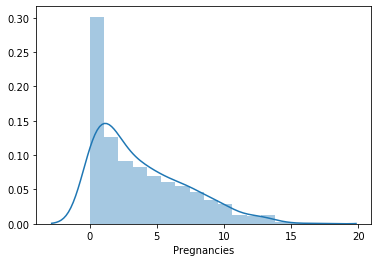

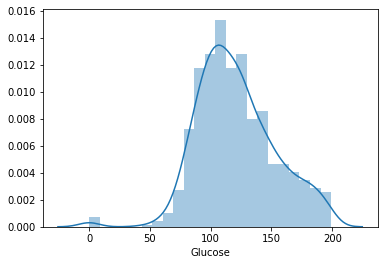

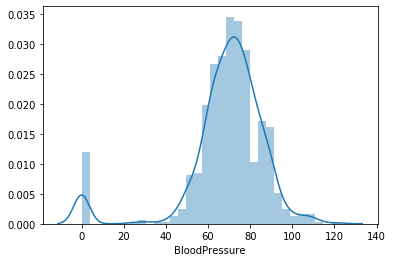

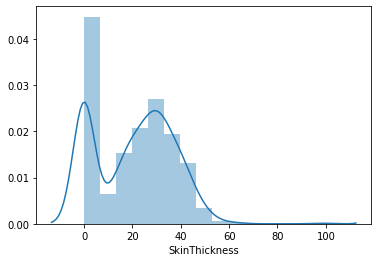

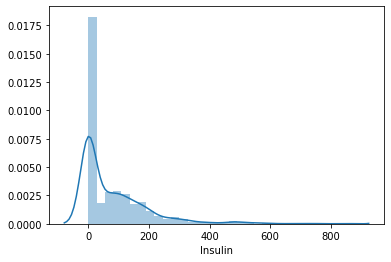

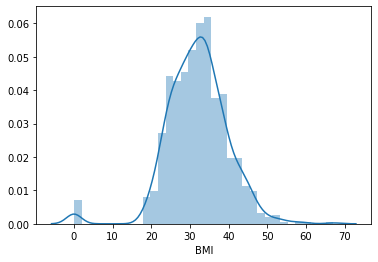

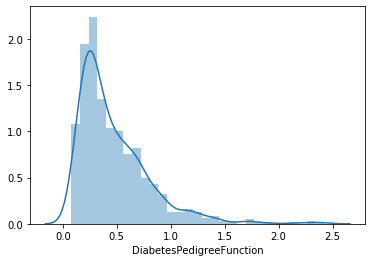

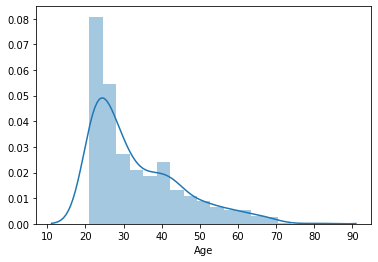

In [8]:
#checking if data is normally distributed

for i in columns:
    sns.distplot(df[i])
    plt.show()

- Pregnancies column is not normally distributed and there are few outliers present.

- In Glucose,BloodPressure,Insulin,SkinThickness,BMI columns we see value 0, this value is irrelevant value.

- This value can be replaced with the median value, as there are outliers present in the data using mean value wont be a good option.

# Data Pre-processing

In [9]:
#Replacing value 0 with median value

for i in columns:
    print(i,'-',df[df[i]==0].shape[0])

Pregnancies - 111
Glucose - 5
BloodPressure - 35
SkinThickness - 227
Insulin - 374
BMI - 11
DiabetesPedigreeFunction - 0
Age - 0


In [10]:
replacing_value=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in replacing_value:
    df[i]=df[i].apply(lambda x: df[i].median() if x==0 else x)

In [11]:
#after replacing values checking columns having 0 as value

for i in columns:
    print(i,'-',df[df[i]==0].shape[0])

Pregnancies - 111
Glucose - 0
BloodPressure - 0
SkinThickness - 0
Insulin - 0
BMI - 0
DiabetesPedigreeFunction - 0
Age - 0


- Columns with irrelevant value 0 is now replaced with median value.

In [12]:
#checking skewness

df.skew()

Pregnancies                 0.901674
Glucose                     0.535587
BloodPressure               0.141885
SkinThickness               1.223057
Insulin                     2.693181
BMI                         0.601059
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

- All the columns are skewed and Insulin,SkinThickness and few others are highly skewed.

- Boxcox Transformation is used to reduce skewness.

In [13]:
#making list of columns with high skewness

skewness_present=[]

for i in df.columns:
    if((df[i].skew()<0.1) or (df[i].skew()>0.2) and (i!='Outcome')):
        skewness_present.append(i)
        
skewness_present

['Pregnancies',
 'Glucose',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [14]:
#using boxcox transformation to reduce skewness

for i in df.columns:
    if i in skewness_present:
        df[i]=list(st.boxcox(df[i]+1)[0])
        
df.skew()

Pregnancies                -0.044644
Glucose                    -0.001560
BloodPressure               0.141885
SkinThickness               0.015171
Insulin                     0.285163
BMI                        -0.000340
DiabetesPedigreeFunction    0.142321
Age                         0.150219
Outcome                     0.635017
dtype: float64

- To read about Boxcox method: https://www.statisticshowto.com/box-cox-transformation

- Skewness is now reduced.

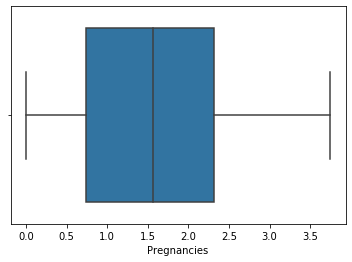

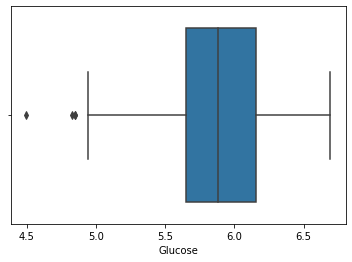

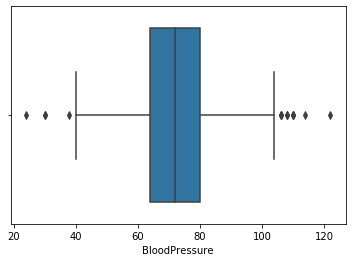

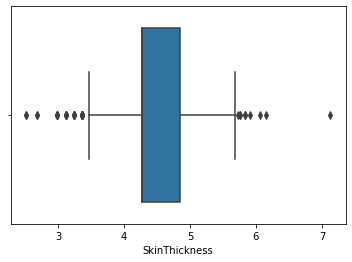

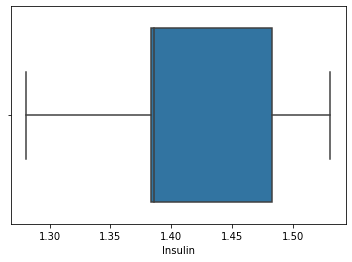

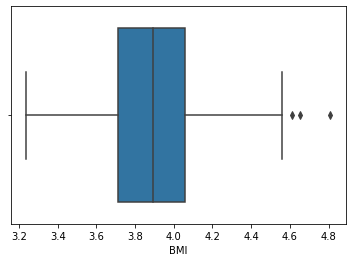

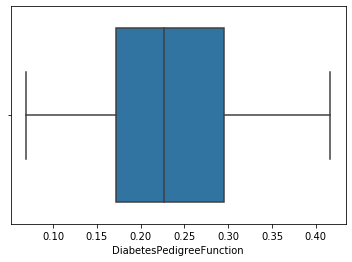

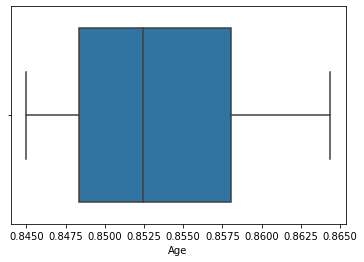

In [15]:
#checking outliers and normality after reducing skewness

for col in columns:
    sns.boxplot(df[col])
    plt.show()

- Oultiers are reduced and in few columns there are no outliers present now.

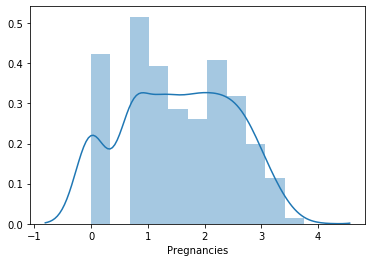

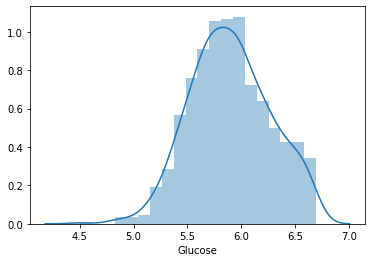

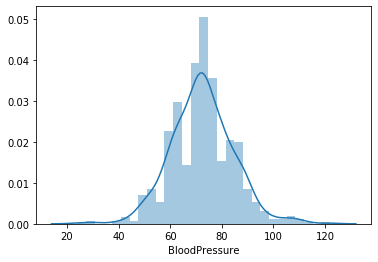

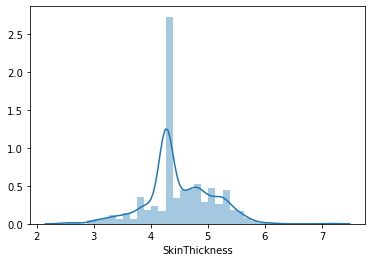

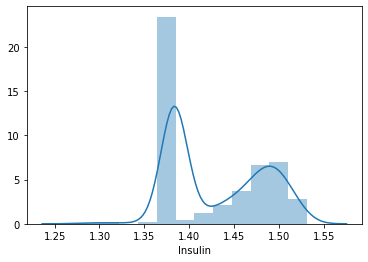

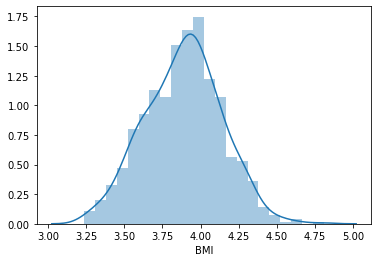

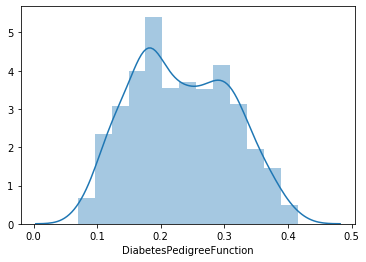

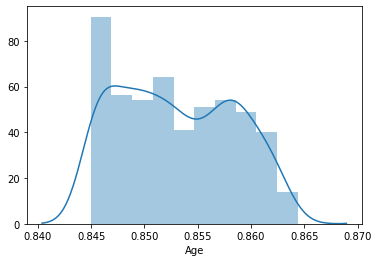

In [16]:
for col in columns:
    sns.distplot(df[col])
    plt.show()

- After reducing skewness, graph looks better as compared to before reducing skewness graph.

In [17]:
#Outlier treatment using z-score

outlier_treatment=st.zscore(df)

df=df[(abs(outlier_treatment)<3).all(axis=1)]

- Outliers are treated with z-score, under 3 sigma conditions that is with 99.7 percent of the data.

- About Z-score: https://www.statisticshowto.com/probability-and-statistics/z-score/

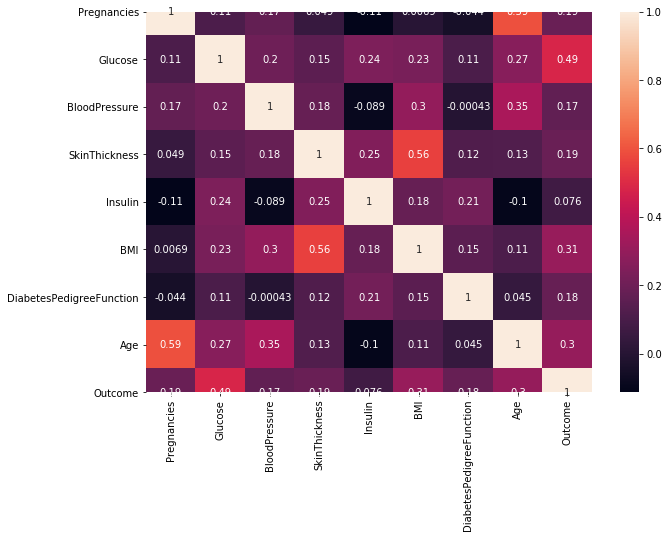

In [18]:
#checking correlation using heatmap

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
correlation=df.corr()

correlation.tail(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.191488,0.486679,0.16828,0.190404,0.076495,0.305391,0.178978,0.302491,1.0


- Glucose have high correlation with target variable as compared to other columns.

- But only looking at the correlation value we cannot decide which variables can be dropped for further modelling process.

In [20]:
#Seperating X(independent variable) and y(dependent variable)

X=df.drop('Outcome',axis=1)
y=df['Outcome']

Xc=sm.add_constant(X)

C:\Users\Kajal Chopda\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
#OLS model

ols_model=sm.OLS(y,Xc).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     44.40
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           2.60e-58
Time:                        09:14:40   Log-Likelihood:                -362.35
No. Observations:                 753   AIC:                             742.7
Df Residuals:                     744   BIC:                             784.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -13.2041      3.029     -4.359      0.000     -19.151      -7.257
Pregnancies                  0.0357      0.019      1.898      0.058      -0.001       0.073
Glucose                      0.5321      0.043     12.303      0.000       0.447       0.617
BloodPressure               -0.0017      0.001     -1.164      0.245      -0.004       0.001
SkinThickness                0.0064      0.032      0.197      0.844      -0.057       0.070
Insulin                     -0.6181      0.304     -2.034      0.042      -1.215      -0.021
BMI                          0.3838      0.074      5.194      0.000       0.239       0.529
DiabetesPedigreeFunction     0.7192      0.191      3.760      0.000       0.344       1.095
Age                         11.3433      3.578      3.170      0.002       4.319      18.367
==============================================================================
Omnibus:                       53.380   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.104
Skew:                           0.230   Prob(JB):                     5.83e-06
Kurtosis:                       2.254   Cond. No.                     2.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

About OLS model: https://www.datarobot.com/blog/ordinary-least-squares-in-python

- SkinThickness,BloodPressure have p-value > 0.05

- R-squared value is very less.

- Durbin Watson value is almost 2 i.e there is no autocorrelation.

In [24]:
#checking vif values to see if multicollinearity is present or not

vif=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=X.columns).T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
vif,1.563886,1.217022,1.275061,1.52691,1.229216,1.606052,1.072562,1.822547


- When we consider threshold as 2,we see there are no columns with multicollinearity present in it.

- Therefore we select all columns for model building.

# Machine Learning Models

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold,cross_val_score,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

from scipy.stats import randint as sp_randint

In [27]:
#splitting data into 70:30

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(527, 8)
(226, 8)
(527,)
(226,)


- For showing both train and test are correct representative of the overall data statistically, we can use two-independent sample t-tests for mean.

- Hypothesis Testing

    H0: pvalue < 0.05
    
    H1: pvalue > 0.05

In [29]:
st.ttest_ind(X_train,X)[1]

array([0.56440743, 0.57500826, 0.94747487, 0.71581563, 0.92351162,
       0.97329305, 0.8480168 , 0.94504731])

In [30]:
st.ttest_ind(X_test,X)[1]

array([0.31735717, 0.33686686, 0.91104691, 0.53130439, 0.86549633,
       0.95337088, 0.73561748, 0.90446646])

In [31]:
st.ttest_ind(y_train,y)[1]

0.6902003838884512

In [32]:
st.ttest_ind(y_test,y)[1]

0.48953937357532284

- As we can see that, the p-values for all the split is greater than 0.05 i.e. splitted data is correct representative of the whole data as our Null Hypothesis is failed to reject.

In [34]:
#standardising data 

ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [37]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
svc=SVC()

In [38]:
models=[]
models.append(('LR',lr))
models.append(('KNN',knn))
models.append(('RF',rf))
models.append(('SVC',svc))

In [44]:
results=[]
names=[]

for name,model in models:
    model.fit(X_train_ss,y_train)
    y_test_pred=model.predict(X_test_ss)
    
    kfold=KFold(shuffle=True,n_splits=3,random_state=3)
    cv_results=cross_val_score(model,X_train_ss,y_train,cv=kfold,scoring='accuracy')
    
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    
    print("%s: %f (%f)"%(name,np.mean(cv_results)*100,np.var(cv_results,ddof=1)))
    print('Classification Report - Test:',name)
    print(classification_report(y_test,y_test_pred))

LR: 73.998918 (0.001472)
Classification Report - Test: LR
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       142
           1       0.76      0.62      0.68        84

    accuracy                           0.79       226
   macro avg       0.78      0.75      0.76       226
weighted avg       0.79      0.79      0.78       226

KNN: 72.300866 (0.000781)
Classification Report - Test: KNN
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       142
           1       0.71      0.57      0.63        84

    accuracy                           0.75       226
   macro avg       0.74      0.72      0.72       226
weighted avg       0.75      0.75      0.75       226

RF: 75.713203 (0.000063)
Classification Report - Test: RF
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       142
           1       0.74      0.62      0.68        84

    ac

- F1 score is used to compare which model is best to use but itcannot be considered for global accuracy.

- I'm fitting 4 base models because all these four models runs on different types of algorithms, based on which we can get the best fitted model which has higher accuracy than others. After looking at the classification report of the each model, we find that RandomForest and Support Vector(SVC) has high f1-score in comparision with other models. So we can consider the RandomForest for going further.

- About classification report: https://muthu.co/understanding-the-classification-report-in-sklearn/

- For RandomForestClassifier the overall accuracy of test is 75.71 percent which is less than desired, so we will have to do some transformations so that our overall accuracy should increase more.

In [46]:
rfc=RandomForestClassifier()
rfc.fit(X_train_ss,y_train)

kfold=KFold(shuffle=True,n_splits=3,random_state=0)
cv_results=cross_val_score(rfc,X_train_ss,y_train,cv=kfold,scoring='accuracy')

y_test_pred=rfc.predict(X_test_ss)

print('Random Forest: ',np.mean(cv_results)*100,np.var(cv_results,ddof=1))
#print('Classification Report - Test:',name)
print(classification_report(y_test,y_test_pred))

Random Forest:  75.13744588744589 0.0008893008236352375
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       142
           1       0.75      0.63      0.68        84

    accuracy                           0.78       226
   macro avg       0.77      0.75      0.76       226
weighted avg       0.78      0.78      0.78       226



- From the above observation we will have to optimize the model, since we can go for hyperparameter tuning and also forward inclusion or backward elimination feature techniques but as we can see above that features are not overfitting or there is no multicollinearity exists, so we will first go for hyperparameter tuning.

In [53]:
#Hyperparameter tuning for Random Forest using RandomizedSearchCV.

rfc=RandomForestClassifier(random_state=3)
params={
    'n_estimators':sp_randint(50,100),
    'max_depth':sp_randint(2,10),
    'min_samples_leaf':sp_randint(1,50),
    'min_samples_split':sp_randint(2,50),
    'max_features':sp_randint(2,15),
    'criterion':['gini','entropy']
}

rsearch=RandomizedSearchCV(rfc,param_distributions=params,cv=3,n_iter=200,scoring='roc_auc',n_jobs=-1,random_state=3)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [54]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 33,
 'n_estimators': 57}

In [62]:
rfc=RandomForestClassifier(**rsearch.best_params_,random_state=3)
rfc.fit(X_train,y_train)

y_train_pred=rfc.predict(X_train) #It will give 01 instead of probability using by default cutoff 0.5
y_train_prob=rfc.predict_proba(X_train)[:,1]

y_test_pred=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]

print('Confusion Matrix - Train: ', '\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train: ', accuracy_score(y_train,y_train_pred))
print('Classification Report - Train:\n ', classification_report(y_train,y_train_pred))
print('AUC Score - Train: ', roc_auc_score(y_train,y_train_prob))

print('\n'*2)

print('Confusion Matrix - Test: ', '\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test: ', accuracy_score(y_test,y_test_pred))
print('Classification Report - Test:\n ', classification_report(y_test,y_test_pred))
print('AUC Score - Test: ', roc_auc_score(y_test,y_test_prob))

Confusion Matrix - Train:  
 [[317  33]
 [ 52 125]]
Accuracy Score - Train:  0.8387096774193549
Classification Report - Train:
                precision    recall  f1-score   support

           0       0.86      0.91      0.88       350
           1       0.79      0.71      0.75       177

    accuracy                           0.84       527
   macro avg       0.83      0.81      0.81       527
weighted avg       0.84      0.84      0.84       527

AUC Score - Train:  0.9197094430992736



Confusion Matrix - Test:  
 [[122  20]
 [ 30  54]]
Accuracy Score - Test:  0.7787610619469026
Classification Report - Test:
                precision    recall  f1-score   support

           0       0.80      0.86      0.83       142
           1       0.73      0.64      0.68        84

    accuracy                           0.78       226
   macro avg       0.77      0.75      0.76       226
weighted avg       0.78      0.78      0.78       226

AUC Score - Test:  0.8615023474178404


- AUC score of train is 91% and for test is 86% whuch means there is overfitting,we will eliminate few columns and finally fit the model.

In [63]:
model=sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.454301
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  753
Model:                          Logit   Df Residuals:                      744
Method:                           MLE   Df Model:                            8
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                  0.2960
Time:                        20:29:32   Log-Likelihood:                -342.09
converged:                       True   LL-Null:                       -485.93
Covariance Type:            nonrobust   LLR p-value:                 1.719e-57
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -89.2927     20.246     -4.410      0.000    -128.973     -49.612
Pregnancies                  0.2344      0.122      1.924      0.054      -0.004       0.473
Glucose                      3.2495      0.327      9.948      0.000       2.609       3.890
BloodPressure               -0.0125      0.009     -1.340      0.180      -0.031       0.006
SkinThickness                0.0777      0.216      0.359      0.719      -0.346       0.502
Insulin                     -3.6902      1.967     -1.876      0.061      -7.546       0.166
BMI                          2.7050      0.522      5.178      0.000       1.681       3.729
DiabetesPedigreeFunction     4.5395      1.274      3.562      0.000       2.042       7.037
Age                         73.9376     23.437      3.155      0.002      28.002     119.873
============================================================================================
"""

- About Logistic Regression: https://www.statisticssolutions.com/regression-analysis-logistic-regression

In [64]:
#Removing insignificant features(p-values>0.05)

cols=list(Xc.columns)
while(len(cols)>0):
    x_1=Xc[cols]
    model=sm.Logit(y,x_1).fit()
    p=model.pvalues
    
    feature_maxp=p.idxmax()
    pmax=max(p)
    if(pmax>0.05):
        cols.remove(feature_maxp)
    else:
        break
        
cols

Optimization terminated successfully.
         Current function value: 0.454301
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.454387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.455575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.457478
         Iterations 7


['const', 'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [65]:
#Taking only the significant columns and fitting the model again
new_lstofcol=['const', 'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Xc=Xc[new_lstofcol]
model=sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.457478
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  753
Model:                          Logit   Df Residuals:                      747
Method:                           MLE   Df Model:                            5
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                  0.2911
Time:                        20:39:23   Log-Likelihood:                -344.48
converged:                       True   LL-Null:                       -485.93
Covariance Type:            nonrobust   LLR p-value:                 4.748e-59
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -91.6543     18.860     -4.860      0.000    -128.620     -54.689
Pregnancies                  0.2412      0.121      1.991      0.047       0.004       0.479
Glucose                      3.0734      0.311      9.891      0.000       2.464       3.682
BMI                          2.5084      0.432      5.810      0.000       1.662       3.355
DiabetesPedigreeFunction     4.2266      1.245      3.396      0.001       1.787       6.666
Age                         72.0596     22.214      3.244      0.001      28.521     115.599
============================================================================================
"""

In [67]:
#Splitting the new dataframe again and fitting the model with hyperparameter also.
X_train, X_test , y_train, y_test = train_test_split(Xc,y, test_size = 0.30, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(527, 6)
(226, 6)
(527,)
(226,)


In [68]:
#Fitting the standard scaling model

X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [69]:
rfc=RandomForestClassifier(**rsearch.best_params_,random_state=3)
rfc.fit(X_train_ss,y_train)

y_train_pred=rfc.predict(X_train_ss) 
y_train_prob=rfc.predict_proba(X_train_ss)[:,1]

y_test_pred=rfc.predict(X_test_ss)
y_test_prob=rfc.predict_proba(X_test_ss)[:,1]

print('Confusion Matrix - Train: ', '\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train: ', accuracy_score(y_train,y_train_pred))
print('Classification Report - Train: ', classification_report(y_train,y_train_pred))
print('AUC Score - Train: ', roc_auc_score(y_train,y_train_prob))

print('\n'*2)

print('Confusion Matrix - Test: ', '\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test: ', accuracy_score(y_test,y_test_pred))
print('Classification Report - Test: ', classification_report(y_test,y_test_pred))
print('AUC Score - Test: ', roc_auc_score(y_test,y_test_prob))

Confusion Matrix - Train:  
 [[311  39]
 [ 53 124]]
Accuracy Score - Train:  0.825426944971537
Classification Report - Train:                precision    recall  f1-score   support

           0       0.85      0.89      0.87       350
           1       0.76      0.70      0.73       177

    accuracy                           0.83       527
   macro avg       0.81      0.79      0.80       527
weighted avg       0.82      0.83      0.82       527

AUC Score - Train:  0.9138175948345438



Confusion Matrix - Test:  
 [[124  18]
 [ 30  54]]
Accuracy Score - Test:  0.7876106194690266
Classification Report - Test:                precision    recall  f1-score   support

           0       0.81      0.87      0.84       142
           1       0.75      0.64      0.69        84

    accuracy                           0.79       226
   macro avg       0.78      0.76      0.77       226
weighted avg       0.78      0.79      0.78       226

AUC Score - Test:  0.8649396378269617


- There is a slight change in values and confusion matrix after eliminating the values and hence we go ahead with this model.

- Further we plot Decision Tree

About Decision Tree : https://scikit-learn.org/stable/modules/tree.html

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 3,max_depth=3, min_samples_leaf=5)
giniDecisionTree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

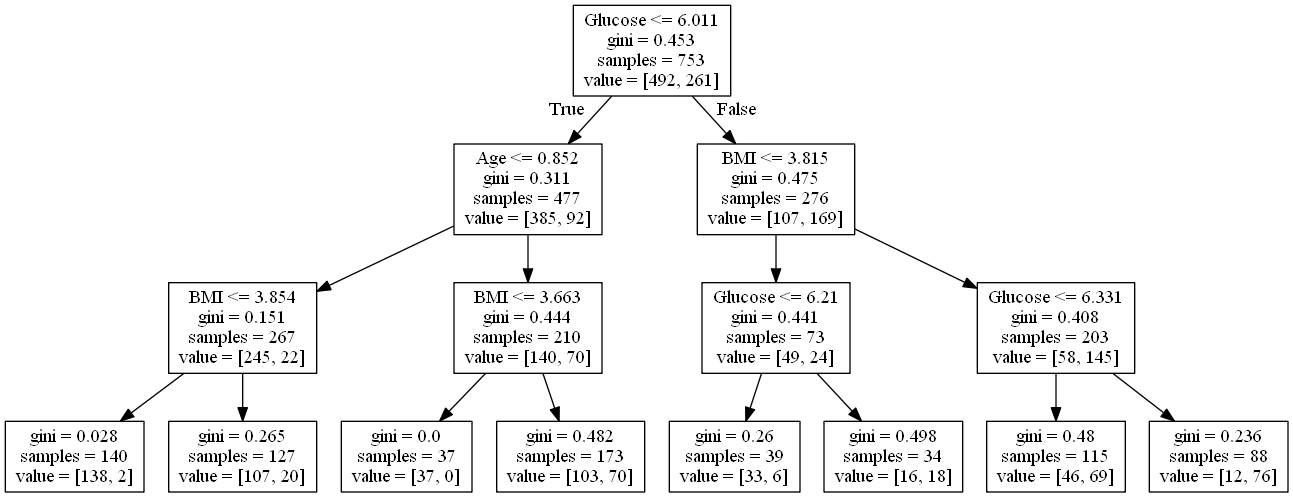

In [76]:
features = X.columns
# Create DOT data
dot_data = export_graphviz(giniDecisionTree, out_file=None, feature_names=features)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
# Show graph
Image(graph.create_png())

Inference:

- From the above decision tree we can see that Glucose is giving us the best purity level after that BMI and age is more impacting on the diabetes condition of the patient if Glucose less than 6.011 than Age is more imapact upon the diabitic condition, if glucose level is more than 6.011 then bmi is affecting more on the diabitic condition of the patient.